# lab2 - Set Covering with Evolutionary Algorithms

In [1]:
import random
from matplotlib import pyplot as plt
from tqdm import tqdm   # pip install "git+https://github.com/tqdm/tqdm.git@devel#egg=tqdm"

from Gene import create_dict_genes
from Individual import Individual
from Genome import Genome

In [2]:
def problem(N, seed=None):
  random.seed(seed)
  return [
    list(set(random.randint(0, N-1) for n in range(random.randint(N//5, N//2))))
    for n in range(random.randint(N, N*5))
  ]

### Global functionalities and parameters

In [3]:
POPULATION_SIZE = 5
OFFSPRING_SIZE = 3
NUM_GENERATIONS = 1000

In [4]:
def tournament(population):
  x, y = tuple(random.choices(population, k=2))
  return x.fight(y)

In [5]:
def initial_population(id_to_genes, N):
  population = list()
  genes = list(id_to_genes.values())
  tot_genes = len(id_to_genes)

  for i in range(POPULATION_SIZE):
    genes = random.choices(genes, k=random.randint(1, N))
    population.append(Individual(Genome(genes), N))

  return population

In [6]:
def plot_gen_best(fitness_log):
  gen_best = [max(f[1] for f in fitness_log if f[0] == x) for x in range(NUM_GENERATIONS)]

  plt.figure(figsize=(15, 6))
  plt.ylabel("cost")
  plt.xlabel("generations")
  #plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".", label='fitness_log')
  plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)], label='gen_best')
  plt.legend()

In [7]:
def print_statistics(winner, N):
  print(f"Genetic Algorithm (N={N}):")
  print(f"\tsuccess = {len(winner.covered)*100/N}%")
  print(f"\tgenome length = {len(winner)}")
  print(f"\tlength - idael_length = {len(winner) - N}")
  print(f"Genome:")
  winner.display()


## Evolution

In [8]:
def genetic_algorithm(population, id_to_genes, N):
  fitness_log = [(0, i.cost) for i in population]

  for g in tqdm(range(NUM_GENERATIONS)):
    offspring = list()
    for i in range(OFFSPRING_SIZE):
      p1 = tournament(population)
      p2 = tournament(population)
      o = p1.reproduce(p2, id_to_genes, N)

      if random.random() < 0.3:
        o = o.mutate(id_to_genes, N)
        
      fitness_log.append((g+1, o.cost))
      offspring.append(o)
    population += offspring
    population = sorted(population, key=lambda i: i.cost)[:POPULATION_SIZE]

  winner = max(population, key=lambda i: i.cost)
  return winner, fitness_log

## Main

### N = 5

100%|██████████| 1000/1000 [00:00<00:00, 2354.30it/s]


Genetic Algorithm (N=5):
	success = 100.0%
	genome length = 5
	length - idael_length = 0
Genome:
[0]
[2]
[4]
[1, 3]


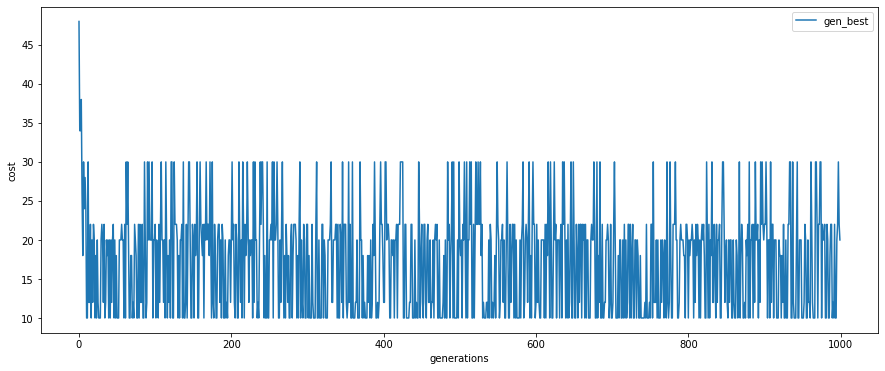

In [9]:
N = 5

clean_problem = set([tuple(sorted(l)) for l in problem(N, 42)])
id_to_genes = create_dict_genes(clean_problem) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes, N)
winner, fitness_log = genetic_algorithm(population, id_to_genes, N)

print_statistics(winner, N)
plot_gen_best(fitness_log)

### N=10

100%|██████████| 1000/1000 [00:00<00:00, 2001.15it/s]


Genetic Algorithm (N=10):
	success = 100.0%
	genome length = 13
	length - idael_length = 3
Genome:
[6]
[0, 3]
[6, 9]
[2, 7, 8]
[0, 4]
[1, 3, 5]


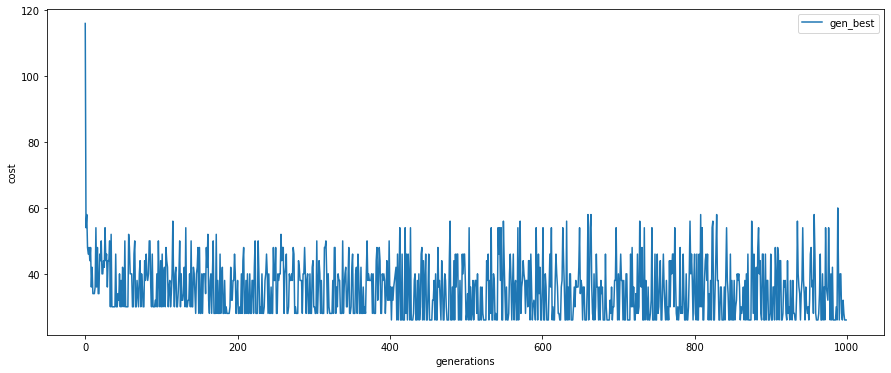

In [10]:
N = 10

clean_problem = set([tuple(sorted(l)) for l in problem(N, 42)])
id_to_genes = create_dict_genes(clean_problem) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes, N)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

print_statistics(winner_GA, N)
plot_gen_best(fitness_log_GA)

### N=20

100%|██████████| 1000/1000 [00:00<00:00, 3196.73it/s]


Genetic Algorithm (N=20):
	success = 100.0%
	genome length = 29
	length - idael_length = 9
Genome:
[5, 8, 16]
[0, 1, 2, 7]
[4, 7, 8]
[3, 6, 7, 13, 15]
[3, 6, 7, 10, 14, 17]
[2, 3, 9, 11, 12, 17, 18, 19]


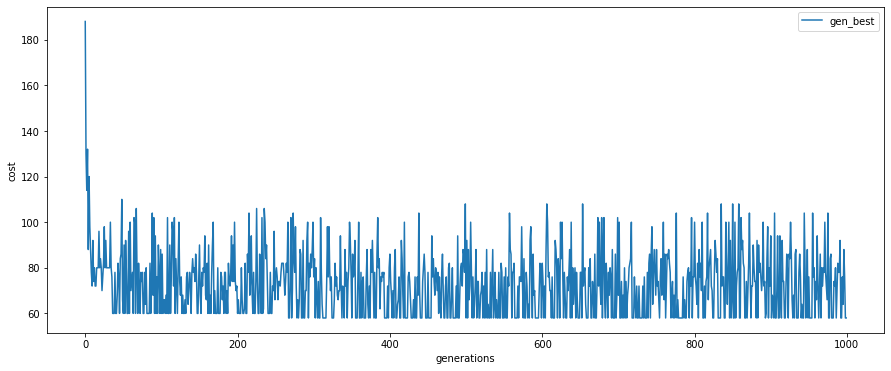

In [11]:
N = 20

clean_problem = set([tuple(sorted(l)) for l in problem(N, 42)])
id_to_genes = create_dict_genes(clean_problem) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes, N)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

print_statistics(winner_GA, N)
plot_gen_best(fitness_log_GA)

### N=100

100%|██████████| 1000/1000 [00:01<00:00, 752.88it/s]


Genetic Algorithm (N=100):
	success = 100.0%
	genome length = 261
	length - idael_length = 161
Genome:
[2, 3, 14, 15, 19, 20, 24, 27, 32, 41, 46, 65, 66, 68, 77, 94, 97]
[1, 5, 11, 15, 19, 20, 21, 31, 35, 47, 50, 60, 63, 74, 76, 88, 98]
[3, 11, 13, 16, 23, 34, 39, 45, 46, 52, 55, 56, 57, 65, 70, 71, 97]
[2, 8, 18, 20, 22, 23, 24, 36, 39, 50, 58, 62, 63, 72, 77, 82, 87, 93]
[2, 10, 12, 16, 29, 31, 34, 38, 52, 57, 70, 71, 72, 75, 81, 83, 86, 97]
[0, 1, 5, 7, 12, 27, 34, 43, 48, 54, 60, 62, 66, 74, 77, 85, 96, 97]
[0, 2, 14, 18, 23, 30, 37, 45, 53, 54, 63, 65, 68, 73, 76, 78, 80, 85, 91]
[4, 9, 10, 12, 15, 25, 29, 33, 35, 37, 42, 45, 46, 56, 64, 65, 69, 82, 86]
[9, 11, 12, 14, 19, 29, 32, 33, 37, 58, 63, 65, 73, 82, 85, 92, 99]
[1, 3, 11, 19, 20, 26, 33, 41, 50, 55, 69, 70, 73, 75, 79, 80, 90, 97, 98]
[6, 12, 15, 18, 20, 24, 30, 31, 34, 37, 40, 41, 49, 53, 57, 59, 73, 78, 92, 97]
[1, 7, 15, 17, 20, 22, 33, 39, 44, 58, 63, 66, 77, 78, 84, 85, 89, 90, 92, 94]
[3, 4, 7, 11, 13, 15, 24, 27, 2

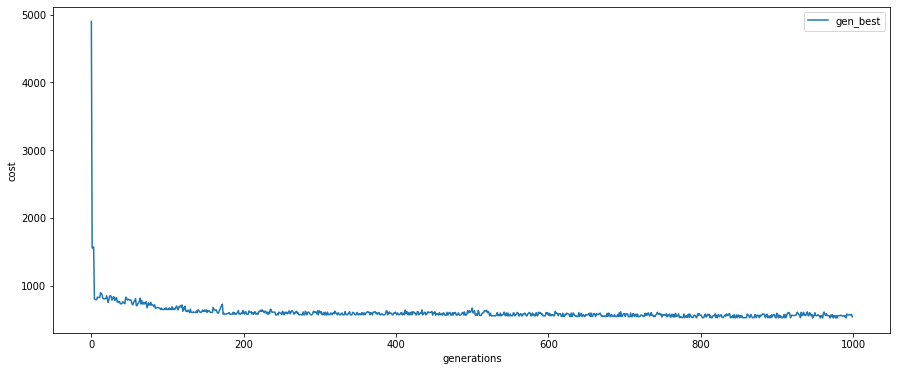

In [12]:
N = 100

clean_problem = set([tuple(sorted(l)) for l in problem(N, 42)])
id_to_genes = create_dict_genes(clean_problem) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes, N)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

print_statistics(winner_GA, N)
plot_gen_best(fitness_log_GA)

### N=500

100%|██████████| 1000/1000 [02:04<00:00,  8.00it/s]


Genetic Algorithm (N=500):
	success = 100.0%
	genome length = 11757
	length - idael_length = 11257
Genome:
[11, 16, 17, 20, 24, 38, 60, 66, 75, 78, 79, 86, 102, 108, 117, 120, 122, 126, 134, 138, 139, 140, 141, 142, 151, 155, 157, 158, 178, 191, 197, 200, 201, 204, 206, 211, 224, 227, 232, 239, 242, 248, 249, 258, 260, 261, 265, 266, 267, 268, 275, 277, 278, 279, 294, 296, 304, 306, 308, 321, 322, 336, 348, 353, 355, 359, 370, 372, 380, 383, 387, 388, 392, 395, 403, 411, 417, 419, 422, 455, 464, 485, 486, 493, 494, 498]
[3, 14, 33, 37, 38, 52, 62, 66, 69, 79, 83, 109, 113, 117, 118, 119, 126, 141, 147, 151, 169, 188, 196, 203, 208, 210, 216, 217, 223, 225, 228, 229, 240, 241, 256, 257, 261, 262, 272, 285, 287, 288, 301, 312, 313, 322, 323, 331, 333, 334, 336, 338, 339, 342, 352, 354, 357, 362, 367, 376, 377, 378, 380, 384, 385, 386, 389, 397, 402, 409, 415, 416, 418, 427, 431, 434, 436, 437, 439, 441, 451, 454, 463, 471, 484, 485, 486, 492, 497, 499]
[0, 12, 14, 19, 36, 46, 56, 57, 61,

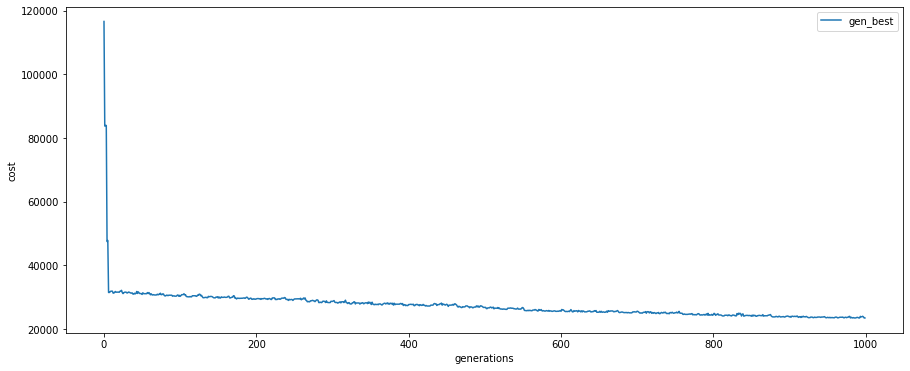

In [13]:
N = 500

clean_problem = set([tuple(sorted(l)) for l in problem(N, 42)])
id_to_genes = create_dict_genes(clean_problem) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes, N)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

print_statistics(winner_GA, N)
plot_gen_best(fitness_log_GA)

### N=1000

100%|██████████| 1000/1000 [04:29<00:00,  3.72it/s]


Genetic Algorithm (N=1000):
	success = 100.0%
	genome length = 24505
	length - idael_length = 23505
Genome:
[0, 1, 9, 18, 20, 36, 48, 62, 71, 73, 79, 80, 93, 94, 108, 110, 123, 128, 131, 132, 143, 155, 167, 170, 176, 193, 198, 208, 210, 225, 232, 236, 238, 254, 260, 266, 267, 268, 282, 288, 314, 316, 317, 320, 322, 333, 335, 338, 342, 345, 357, 358, 360, 362, 364, 382, 383, 386, 387, 391, 396, 408, 409, 417, 426, 427, 429, 430, 431, 434, 435, 440, 444, 450, 455, 459, 472, 473, 484, 485, 489, 491, 496, 498, 499, 504, 513, 514, 516, 521, 522, 526, 553, 559, 571, 574, 580, 590, 598, 602, 607, 608, 619, 625, 633, 641, 649, 656, 672, 673, 679, 685, 710, 711, 714, 720, 727, 732, 734, 742, 759, 762, 764, 766, 767, 776, 779, 784, 785, 787, 793, 800, 807, 815, 817, 820, 826, 828, 830, 836, 837, 841, 842, 843, 844, 851, 859, 863, 869, 874, 880, 881, 886, 888, 893, 897, 899, 901, 902, 905, 909, 919, 927, 928, 932, 935, 944, 947, 948, 951, 962, 964, 969, 978, 996, 999]
[8, 9, 22, 23, 33, 36, 39, 4

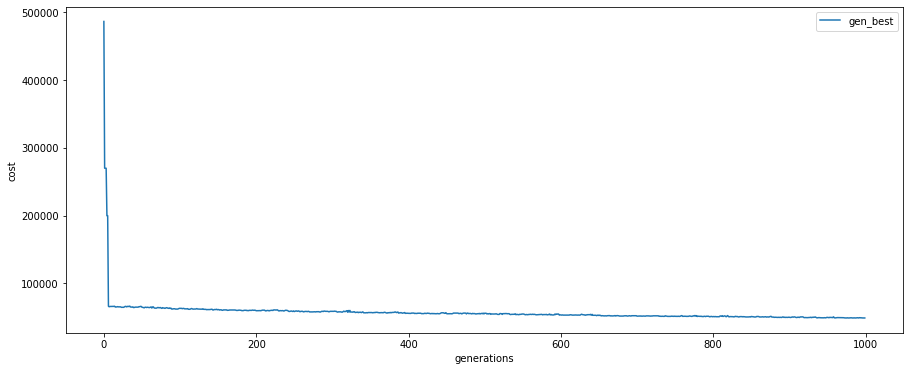

In [14]:
N = 1000

clean_problem = set([tuple(sorted(l)) for l in problem(N, 42)])
id_to_genes = create_dict_genes(clean_problem) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes, N)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

print_statistics(winner_GA, N)
plot_gen_best(fitness_log_GA)